In [69]:
import pandas as pd
import seaborn as see
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [70]:
hap_sgd =  pd.read_csv("E:\ML project\heart.csv")
hap_sgd.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
scaler =  MinMaxScaler()
hap_sgd = scaler.fit_transform(hap_sgd)
colomNames = ['age', 'sex', 'cp', 'trtbps', 'chol',	'fbs',	'restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall', 'output']
hap_sgd = pd.DataFrame(hap_sgd, columns= colomNames)
hap_sgd.set_index('age', inplace=True)
hap_sgd.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [72]:
x = hap_sgd.drop('output', axis=1)
y = hap_sgd['output']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, stratify=y, random_state=23)

In [74]:
from sklearn.linear_model import SGDClassifier

In [75]:
hap_SGD = SGDClassifier(loss= 'perceptron')

In [76]:
hap_SGD.fit(x_train, y_train)

SGDClassifier(loss='perceptron')

In [77]:
hap_SGD.score(x_test, y_test)

0.9130434782608695

In [78]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
pred = hap_SGD.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('F1-Score: ', f1_score(y_test, pred))

Accuracy:  0.9130434782608695
Recall:  0.92
Precision:  0.92
F1-Score:  0.92


<AxesSubplot:>

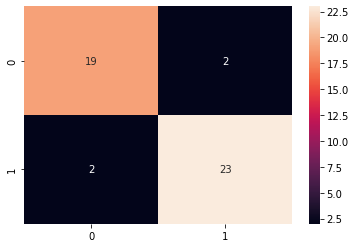

In [79]:
confusionM = confusion_matrix(y_test, pred)   
see.heatmap(confusionM, annot= True)  